# Operators overview {#ref_basic_operators_example}

In DPF, operators provide the primary method for interacting with and
extracting results. Within DPF-Core, operators are directly exposed with
the `Operators` class as well as wrapped within several other
convenience classes.

For a list of all operators, see
`ref_dpf_operators_reference`{.interpreted-text role="ref"}.

This example demonstrates how to work directly with operators and
compares this method to a wrapped approach.


In [1]:
# Import the necessary modules
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create a model object to establish a connection with an example result
file:


In [2]:
model = dpf.Model(examples.find_static_rst())
print(model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  81 nodes 
  8 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 1 
Cumulative     Time (s)       LoadStep       Sub

Next, create a raw displacement operator `"U"`. Each operator contains
`input` and `output` pins that can be connected to various sources to
include other operators. This allows operators to be \"chained\" to
allow for highly efficient operations.

To print out the available inputs and outputs of the displacement
operator:


In [3]:
disp_op = dpf.Operator("U")
print(disp_op.inputs)
print(disp_op.outputs)

Available inputs:
     -   time_scoping : Scoping, int, list, float, Field, optional
         Time/freq (use doubles or field), time/freq set ids (use ints or
         scoping) or time/freq step ids (use scoping with timefreq_steps
         location) required in output
                             
     -   mesh_scoping : ScopingsContainer, Scoping, optional
         Nodes or elements scoping required in output. the scoping's location
         indicates whether nodes or elements are asked. using scopings
         container enables to split the result fields container in domains
                             
     -   fields_container : FieldsContainer, optional
         Fields container already allocated modified inplace
                             
     -   streams_container : StreamsContainer, optional
         Result file container allowed to be kept open to cache data
                             
     -   data_sources : DataSources
         Result file path container, used if no s

# Compute the maximum normalized displacement

This example demonstrate how to chain various operators. It connects the
input of the operator to the data sources contained within the `model`
object and then the maximum of the norm of the operator.


In [4]:
# Connect to the data sources of the model.
disp_op.inputs.data_sources.connect(model.metadata.data_sources)

# Create a fields container norm operator and connect it to the
# displacement operator to chain the operators.
norm_op = dpf.Operator("norm_fc")
norm_op.inputs.connect(disp_op.outputs)

# Create a fields container min/max operator and connect it to the
# output of the norm operator.
mm_op = dpf.Operator("min_max_fc")
mm_op.inputs.connect(norm_op.outputs)

# Finally, get the value of the maximum displacement.
field_max = mm_op.outputs.field_max()
print(field_max)
print(field_max.data)

DPF displacement_1.s Field
  Location: Nodal
  Unit: m
  1 entities 
  Data:1 components and 1 elementary data 

[1.48153706e-08]


# Wrapped operators

The `model.results` property contains all the wrapped operators
available for a given result. This is provided out of convenience
because all operators may not be available for a given result.
Consequently, it is much easier to reference available operators by
first running:


In [5]:
print(model.results)

Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature



Create the displacement operator directly from the `results` property:


In [6]:
disp_op = model.results.displacement()

# Out of convenience, the ``operators`` module contains available operators.
# These operators can be chained to create a workflow in one line.
from ansys.dpf.core import operators

mm_op = operators.min_max.min_max_fc(operators.math.norm_fc(disp_op))

# Finally, get the value of the maximum displacement.
field_max = mm_op.outputs.field_max()
print(field_max)
print(field_max.data)

DPF displacement_1.s Field
  Location: Nodal
  Unit: m
  1 entities 
  Data:1 components and 1 elementary data 

[1.48153706e-08]


Plot the displacement:


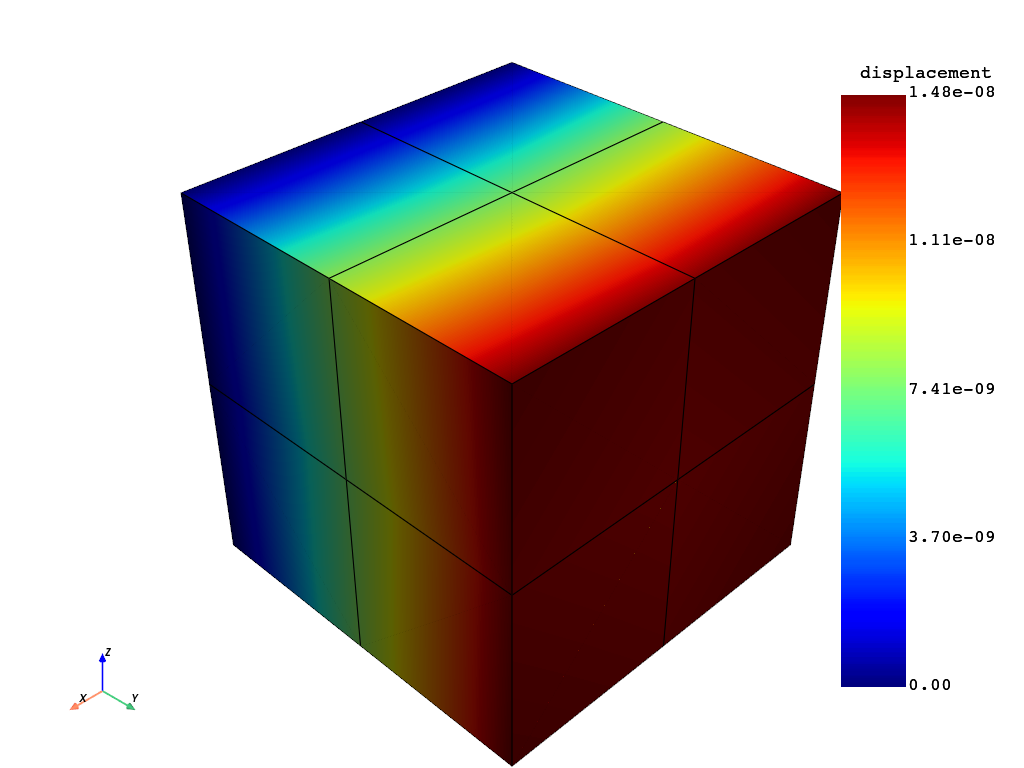

None


In [7]:
print(model.metadata.meshed_region.plot(disp_op.outputs.fields_container()))

# Scripting operator syntax

Because DPF provides a scripting syntax, knowing an operator\'s \"string
name\" is not mandatory. While this example is similar to the above
script, it uses the DPF scripting syntax.


Instead of using a `model` class instance, use a `DdataSources` object
directly. The `DataSources` constructor input is a path.


In [8]:
ds = dpf.DataSources(examples.find_static_rst())
print(examples.find_static_rst())

G:\venv\pymapdl-venv\lib\site-packages\ansys\dpf\core\examples\result_files\static.rst


Instantiate the operators and connect them:


In [9]:
disp_op = dpf.operators.result.displacement()
disp_op.inputs.data_sources.connect(ds)
norm_op = dpf.operators.math.norm_fc()
norm_op.inputs.connect(disp_op.outputs)
mm_op = dpf.operators.min_max.min_max_fc()
mm_op.inputs.connect(norm_op.outputs)

Get the output and print the result data:


In [10]:
field_max = mm_op.outputs.field_max()
print(field_max.data)

[1.48153706e-08]
